<a href="https://colab.research.google.com/github/yiheng870106/Mathematics-of-Data-Science-Project-2-yiheng/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


Inertia =  924.3159961688092


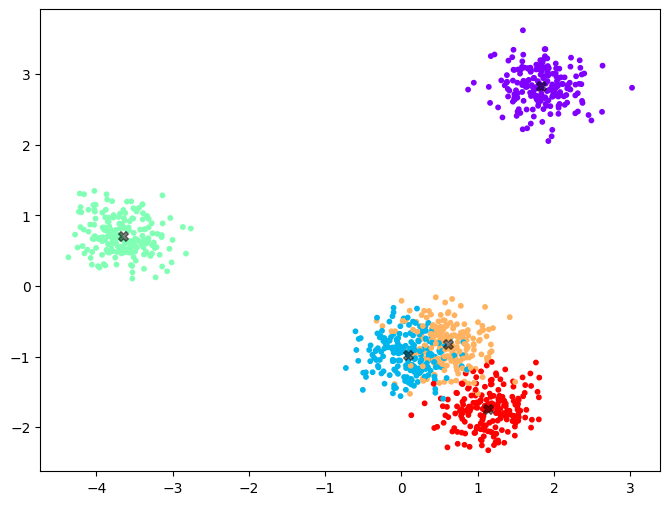

Confusion Matrix: 
 [[  0   0   0 200   0]
 [  0 200   0   0   0]
 [200   0   0   0   0]
 [  0   0 200   0   0]
 [  0   0   0   0 200]]
Confusion Matrix (aligned): 
 [[200   0   0   0   0]
 [  0 200   0   0   0]
 [  0   0 200   0   0]
 [  0   0   0 200   0]
 [  0   0   0   0 200]]


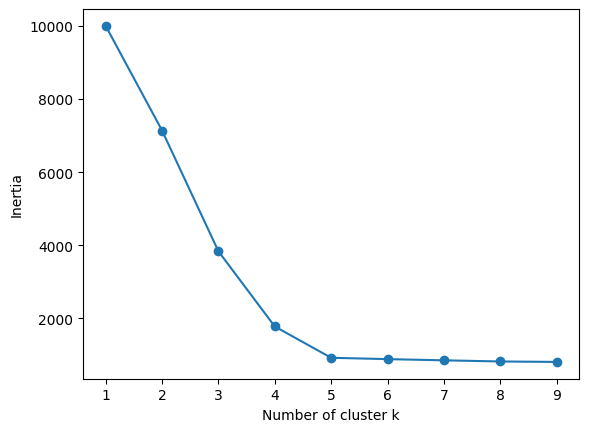

In [ ]:
import matplotlib.pyplot as plt

# perform a k-means cluster analysis with k = 5.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=1).fit(X)
y_kmeans = kmeans.labels_

# Report your smallest k-means inertia value.
print("Inertia = ",kmeans.inertia_)

# Make a 2D visualization of your clusters via PCA, including both the clusters (colored by cluster) and the cluster centers.
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
center_pca = pca.transform(kmeans.cluster_centers_)
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_kmeans, s=10, cmap="rainbow")
plt.scatter(center_pca[:,0],center_pca[:,1],c="black",marker="X",s=50,alpha=0.5)
#plt.title("KMeans Clusters (PCA 2D Projection)")
#plt.xlabel("PC1")
#plt.ylabel("PC2")
plt.show()

# make a confusion matrix that compares your assigned labels to the “true” labels. Here, you’ll have to figure out how to best match the predicted and true labels.
from sklearn.metrics import confusion_matrix
print("Confusion Matrix: \n", confusion_matrix(y_true, y_kmeans))

map = {0:2,1:1,2:3,3:0,4:4}
y_kmeans_aligned = np.array([map[label] for label in y_kmeans])
print("Confusion Matrix (aligned): \n", confusion_matrix(y_true, y_kmeans_aligned))

# perform an “elbow analysis” to justify the use of k = 5.
inertias = []
K =range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=1).fit(X)
    inertias.append(kmeans.inertia_)
#idx = np.argmin(inertias)
#print("Best k = ",K[idx])
#print("Smallest inertia =", inertias[idx])
plt.plot(K, inertias, marker="o")
plt.xlabel('Number of cluster k')
plt.ylabel('Inertia')
#3plt.title('Elbow Analysis')
plt.show()

# 2. Clustering Fashion-MNIST using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


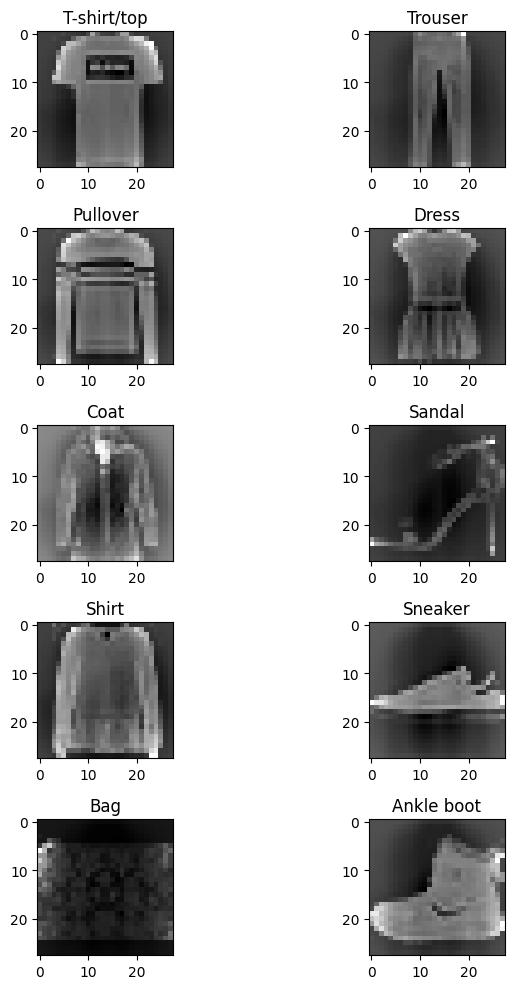

In [ ]:
# To get a sense of this dataset, first make a 5×2 array of figures, each plotting a distinct article of clothing.
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(5,2,figsize=(8,10))
for i in range(5):
    for j in range(2):
        idx = np.where(y==2*i+j)[0][0]
        img = X[idx].reshape(28,28)
        ax[i,j].imshow(img, cmap="gray")
        ax[i,j].set_title(class_names[2*i+j])
plt.tight_layout()
plt.show()

Inertia =  30530431.147042908
Confusion Matrix (aligned): 
 [[4068  220   84    1   84  681 1813    5   44    0]
 [ 261 6320   11    0   59  183  165    0    1    0]
 [ 152   13  475    0 3767  599 1977    3   12    2]
 [1840 3734    6    0   43  595  780    0    1    1]
 [ 989  217  215    0 4038  310 1228    0    3    0]
 [   1    1    2  299    0 4556   48 1602    0  491]
 [1293   73  297    1 1949  928 2375    8   74    2]
 [   0    0    0   17    0  622    0 5602    0  759]
 [  53   18 2093    9   79  430 1376  341 2394  207]
 [   7    3    0 2397    3  192   62  282    1 4053]]


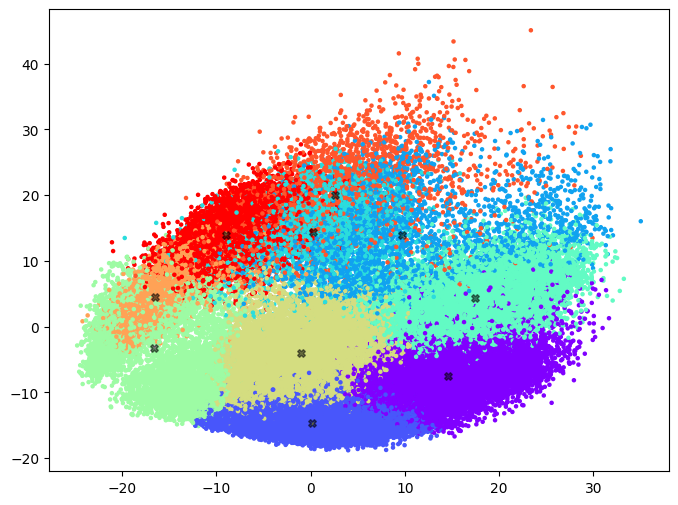

In [ ]:
# Write code to perform a k-means cluster analysis on this dataset, centering/scaling as appropriate.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

X = StandardScaler().fit_transform(X)
kmeans = KMeans(n_clusters=10, random_state=1).fit(X)
y_kmeans = kmeans.labels_

print("Inertia = ",kmeans.inertia_)

cm = confusion_matrix(y, y_kmeans)
row_ind, col_ind = linear_sum_assignment(-cm)
map = dict(zip(col_ind, row_ind))
y_kmeans_aligned = np.array([map[label] for label in y_kmeans])
print("Confusion Matrix (aligned): \n", confusion_matrix(y, y_kmeans_aligned))

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X)
center_pca = pca2.transform(kmeans.cluster_centers_)
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0],X_pca2[:,1],c=y_kmeans_aligned, s=5, cmap="rainbow")
plt.scatter(center_pca[:,0],center_pca[:,1],c="black",marker="X",s=30,alpha=0.5)
plt.show()

Number of components to retain >=95% variance:  256
Number of components to retain >=95% variance:  137
Elbow point (best n_components): 96
Best cumulative_variance_ratio : 0.8677868253677329


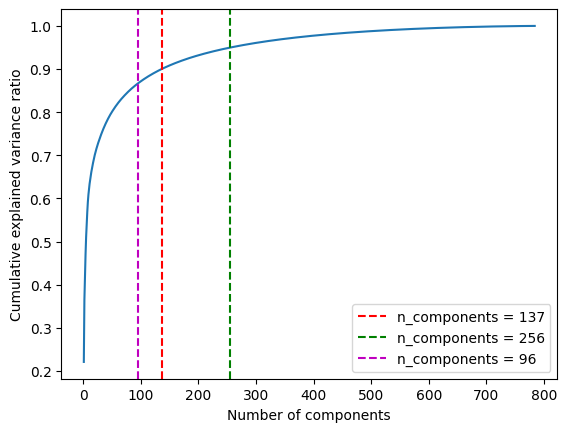

In [ ]:
# This is a larger dataset, so you may have to reduce the dimension/sample size as appropriate.from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

X = StandardScaler().fit_transform(X)
pca = PCA()
X_pca = pca.fit_transform(X)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
n_component_95 = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print("Number of components to retain >=95% variance: ", n_component_95)
n_component_90 = np.argmax(cumulative_variance_ratio >= 0.90) + 1
print("Number of components to retain >=95% variance: ", n_component_90)

!pip install kneed
from kneed import KneeLocator
knee = KneeLocator(range(1, 785),
                   cumulative_variance_ratio,
                   curve='concave', direction='increasing')
print("Elbow point (best n_components):", knee.knee)
print("Best cumulative_variance_ratio :", knee.knee_y)

plt.plot(np.arange(1,785), cumulative_variance_ratio)
plt.axvline(x=n_component_90-1, color='r', linestyle='--', label=f'n_components = {n_component_90}')
plt.axvline(x=n_component_95-1, color='g', linestyle='--', label=f'n_components = {n_component_95}')
plt.axvline(x=knee.knee-1, color='m', linestyle='--', label=f'n_components = {knee.knee}')
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance ratio")
plt.legend()
plt.show()

Inertia (pca95) =  27929971.49544168
Confusion Matrix (pca95): 
 [[3222   63   40 1148   66  432 1997    5   27    0]
 [  16 6153    5  444   62  121  198    0    1    0]
 [ 213    7   29  197 3963  420 2091    5   74    1]
 [  52 2598    1 2974   49  415  906    0    4    1]
 [  11   72    9 1353 4125  220 1150    1   59    0]
 [   0    0    1    4    0 4859   68 1525    8  535]
 [ 758   29   89  794 2097  704 2471   10   47    1]
 [   0    0    0    0    0  786    1 5958    0  255]
 [  66   10 2491   98  118  393  627  473 2699   25]
 [   2    1    2   24   12  241   64  974    2 5678]]


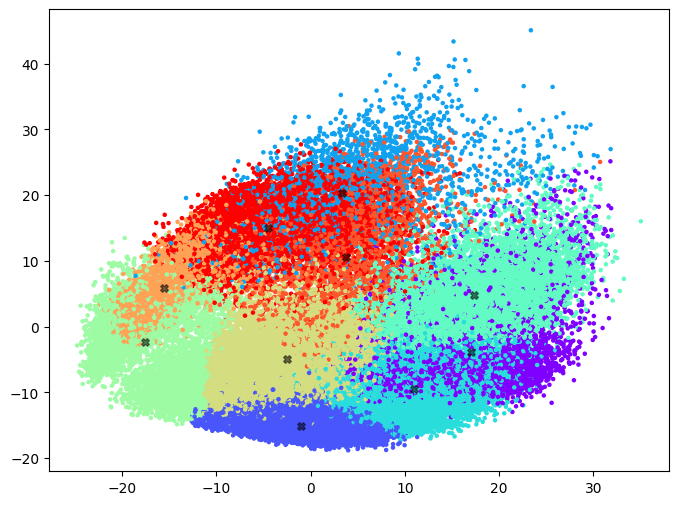

Inertia (pca90) =  25103650.800940488
Confusion Matrix (pca90): 
 [[3502   78   43 1241   74    2 2025    6   29    0]
 [  20 6098    5  473   71    0  332    0    1    0]
 [ 222    7   29  247 4263    1 2121    5  101    4]
 [  60 2512    1 3097   55    0 1269    0    5    1]
 [  10   78    8 1447 4322    0 1072    1   62    0]
 [   0    0    0    5    0  311 2046 4016   12  610]
 [ 839   34   89  925 2318    2 2719   14   57    3]
 [   0    0    0    0    0   18   29 6007    0  946]
 [  60    9 2507  144  119   29  783  404 2735  210]
 [   0    1    1   24    4 2508  164  229    1 4068]]


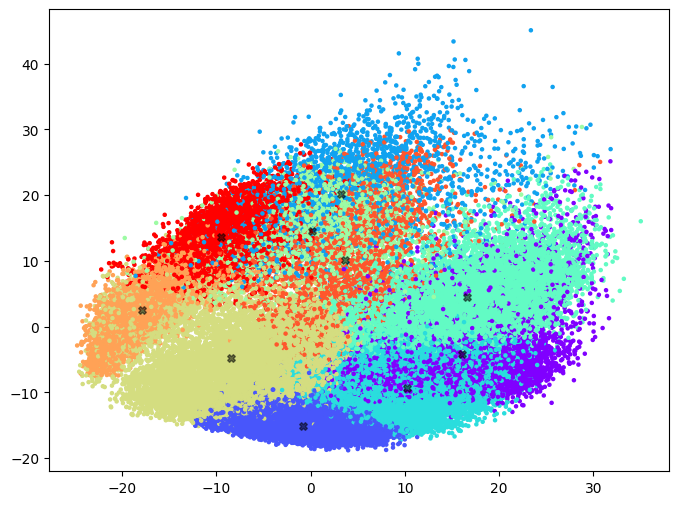

In [ ]:
# PCA_95% and PCA_90%
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

X = StandardScaler().fit_transform(X)
pca95 = PCA(n_components=0.95)
X_pca95 = pca95.fit_transform(X)

kmeans_pca95 = KMeans(n_clusters=10, random_state=1).fit(X_pca95)
y_kmeans_pca95 = kmeans_pca95.labels_

print("Inertia (pca95) = ",kmeans_pca95.inertia_)

cm_pca95 = confusion_matrix(y, y_kmeans_pca95)
row_ind_pca95, col_ind_pca95 = linear_sum_assignment(-cm_pca95)
map_pca95 = dict(zip(col_ind_pca95, row_ind_pca95))
y_kmeans_aligned_pca95 = np.array([map_pca95[label] for label in y_kmeans_pca95])
print("Confusion Matrix (pca95): \n", confusion_matrix(y, y_kmeans_aligned_pca95))

pca2 = PCA(n_components=2)
X_pca2_pca95 = pca2.fit_transform(X_pca95)
center_pca95 = pca2.transform(kmeans_pca95.cluster_centers_)
plt.figure(figsize=(8,6))
plt.scatter(X_pca2_pca95[:,0],X_pca2_pca95[:,1],c=y_kmeans_aligned_pca95, s=5, cmap="rainbow")
plt.scatter(center_pca95[:,0],center_pca95[:,1],c="black",marker="X",s=30,alpha=0.5)
plt.show()

pca90 = PCA(n_components=0.9)
X_pca90 = pca90.fit_transform(X)

kmeans_pca90 = KMeans(n_clusters=10, random_state=1).fit(X_pca90)
y_kmeans_pca90 = kmeans_pca90.labels_

print("Inertia (pca90) = ",kmeans_pca90.inertia_)

cm_pca90 = confusion_matrix(y, y_kmeans_pca90)
row_ind_pca90, col_ind_pca90 = linear_sum_assignment(-cm_pca90)
map_pca90 = dict(zip(col_ind_pca90, row_ind_pca90))
y_kmeans_aligned_pca90 = np.array([map_pca90[label] for label in y_kmeans_pca90])
print("Confusion Matrix (pca90): \n", confusion_matrix(y, y_kmeans_aligned_pca90))

pca2 = PCA(n_components=2)
X_pca2_pca90 = pca2.fit_transform(X_pca90)
center_pca90 = pca2.transform(kmeans_pca90.cluster_centers_)
plt.figure(figsize=(8,6))
plt.scatter(X_pca2_pca90[:,0],X_pca2_pca90[:,1],c=y_kmeans_aligned_pca90, s=5, cmap="rainbow")
plt.scatter(center_pca90[:,0],center_pca90[:,1],c="black",marker="X",s=30,alpha=0.5)
plt.show()

Inertia (pca_best) =  23383179.22343499
Confusion Matrix (pca_best): 
 [[3414  135    2 1074   75 1033 1212    5   50    0]
 [  13 6178    0  441   59  197  106    0    6    0]
 [ 142   12    1  173 3814  772 2003    3   79    1]
 [  51 2732    0 2983   41  734  454    0    4    1]
 [   6  101    0 1299 3946  405 1214    0   29    0]
 [   0    0  289    4    0 4414   44 1742    2  505]
 [ 753   49    0  770 1960 1210 2127    8  121    2]
 [   0    0   17    0    0  532    0 5706    0  745]
 [  41   15   31   69  231  462 2190  346 3451  164]
 [   0    1 2343   11    4  188   59  294    1 4099]]


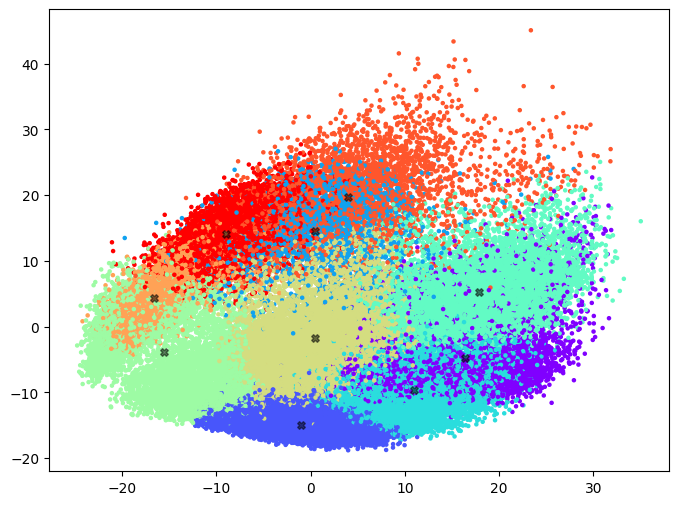

In [ ]:
pca_best = PCA(n_components=96)
X_pca_best = pca_best.fit_transform(X)

kmeans_pca_best = KMeans(n_clusters=10, random_state=1).fit(X_pca_best)
y_kmeans_pca_best = kmeans_pca_best.labels_

print("Inertia (pca_best) = ",kmeans_pca_best.inertia_)

cm_pca_best = confusion_matrix(y, y_kmeans_pca_best)
row_ind_pca_best, col_ind_pca_best = linear_sum_assignment(-cm_pca_best)
map_pca_best = dict(zip(col_ind_pca_best, row_ind_pca_best))
y_kmeans_aligned_pca_best = np.array([map_pca_best[label] for label in y_kmeans_pca_best])
print("Confusion Matrix (pca_best): \n", confusion_matrix(y, y_kmeans_aligned_pca_best))

pca2 = PCA(n_components=2)
X_pca2_pca_best = pca2.fit_transform(X_pca_best)
center_pca_best = pca2.transform(kmeans_pca_best.cluster_centers_)
plt.figure(figsize=(8,6))
plt.scatter(X_pca2_pca_best[:,0],X_pca2_pca_best[:,1],c=y_kmeans_aligned_pca_best, s=5, cmap="rainbow")
plt.scatter(center_pca_best[:,0],center_pca_best[:,1],c="black",marker="X",s=30,alpha=0.5)
plt.show()

# 3. Dimensionality reduction for Fashion-MNIST

In [ ]:
# Import the data and center/scale as appropriate.
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler

X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
X = StandardScaler().fit_transform(X)
n = 3000
np.random.seed(1)
X_sub = X[np.random.choice(len(X), n, replace=False)]

# Implement both PCA and Random Projection methods for target dimensions k ∈ {10, 20, 50, 100, 200}.
# For each reduced dataset, compute the correlation between pairwise distances in the original standardized space and the reduced space.
from sklearn.metrics import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.random_projection import GaussianRandomProjection

upperTriangle = np.triu_indices(n, k=1)
D = pairwise_distances(X_sub)[upperTriangle]

dims = [10, 20, 50, 100, 200]
corr_pca = []
corr_rp = []
for dim in dims:
    pca = PCA(n_components=dim, random_state = 1)
    X_pca = pca.fit_transform(X_sub)
    D_pca = pairwise_distances(X_pca)[upperTriangle]
    corr_pca.append(np.corrcoef(D, D_pca)[0,1])

for dim in dims:
    rp = GaussianRandomProjection(n_components=dim, random_state = 1)
    X_rp = rp.fit_transform(X_sub)
    D_rp = pairwise_distances(X_rp)[upperTriangle]
    corr_rp.append(np.corrcoef(D, D_rp)[0,1])


Correlation (original vs PCA distances) for dim = 10, 20, 50, 100, 200:
0.9306824382815195
0.9653499544286971
0.9873749651517594
0.9954323682346666
0.9989194466392332
Correlation (original vs RP distances) for dim = 10, 20, 50, 100, 200:
0.8200142230346854
0.885296735016078
0.9503358812728017
0.9745424940542755
0.9856615625600044


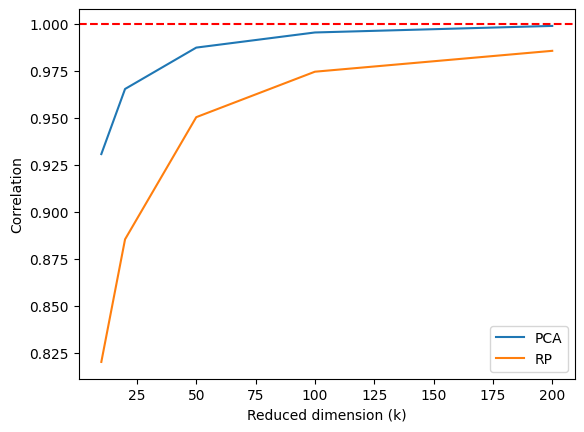

In [ ]:
# Make a plot of this correlation vs. k for the two methods.
print("Correlation (original vs PCA distances) for dim = 10, 20, 50, 100, 200:")
for corr in corr_pca:
    print(corr)
print("Correlation (original vs RP distances) for dim = 10, 20, 50, 100, 200:")
for corr in corr_rp:
    print(corr)

import matplotlib.pyplot as plt
plt.plot(dims, corr_pca, label="PCA")
plt.plot(dims, corr_rp, label="RP")
plt.axhline(y=1, color='r', linestyle='--')
plt.xlabel("Reduced dimension (k)")
plt.ylabel("Correlation")
plt.legend()
plt.show()

# 4. Clustering Fashion-MNIST using spectral clustering

Confusion Matrix (spectral): 
 [[116   0   3  12   8   1  50   0   2   0]
 [  0 191   2   9   3   0   4   0   0   0]
 [  0   0 119   1  16   2  49   0   0   0]
 [  2   0   0 128  46   0  30   0   1   0]
 [  0   0 100   2  76   0  27   0   0   0]
 [  0   0   0   1   0  37  72  98   0   8]
 [ 28   0  65   5  18   5  85   0   0   0]
 [  0   0   0   0   0  42   2 146   0   1]
 [  0   0   7  13   3  81  13   4  69   0]
 [  0   0   0   0   0  74   6   2   0 115]]
Clustering accuracy : 0.541


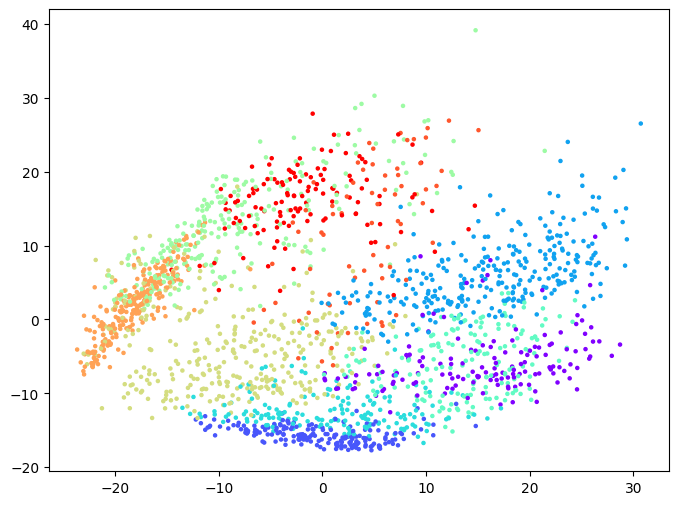

In [1]:
# Write code to use spectral clustering to cluster the data.
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment

X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
X = StandardScaler().fit_transform(X)
y = y.astype(int)

n = 2000
np.random.seed(1)
indices = np.random.choice(len(X), n, replace=False)
X_sub = X[indices]
y_sub = y[indices]

spectral = SpectralClustering(n_clusters=10, affinity="nearest_neighbors", assign_labels="kmeans", random_state=1)
y_spectral = spectral.fit_predict(X_sub)

cm_spectral = confusion_matrix(y_sub, y_spectral)
row_ind_spectral, col_ind_spectral = linear_sum_assignment(-cm_spectral)
map_spectral = dict(zip(col_ind_spectral, row_ind_spectral))
y_spectral_aligned = np.array([map_spectral[label] for label in y_spectral])
print("Confusion Matrix (spectral): \n", confusion_matrix(y_sub, y_spectral_aligned))

accuracy = np.mean(y_spectral_aligned == y_sub)
print("Clustering accuracy :", accuracy)

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_sub)
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0],X_pca2[:,1],c=y_spectral_aligned, s=5, cmap="rainbow")
plt.show()

Confusion Matrix (aligned): 
 [[114   4   3   0   1  18  49   0   3   0]
 [  5 195   2   0   0   3   4   0   0   0]
 [  5   1 119   1   0  17  44   0   0   0]
 [ 55 108   0   0   0  15  29   0   0   0]
 [ 41   2 116   0   0   7  39   0   0   0]
 [  0   0   0  39  10 134   2  25   0   6]
 [ 44   0  61   1   1  36  58   1   4   0]
 [  0   0   0  65   1   8   0 114   0   3]
 [  1   1  12  15  23  15  51   1  69   2]
 [  0   0   0  28  54   5   4   1   0 105]]
Clustering accuracy : 0.454


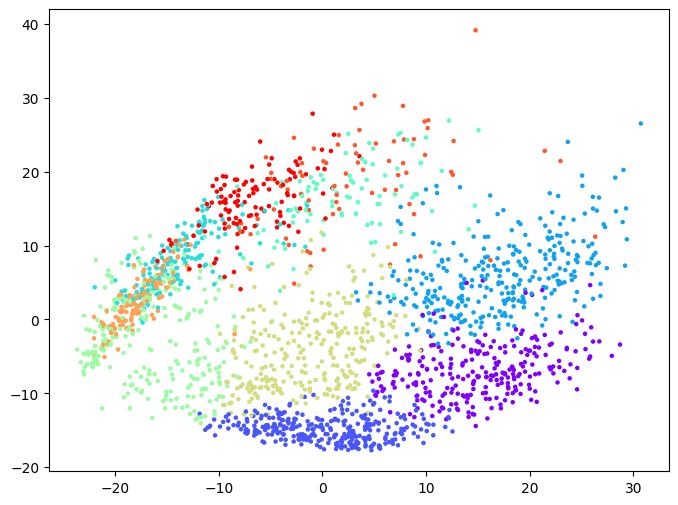

In [2]:
kmeans = KMeans(n_clusters=10, random_state=1).fit(X_sub)
y_kmeans = kmeans.labels_

cm = confusion_matrix(y_sub, y_kmeans)
row_ind, col_ind = linear_sum_assignment(-cm)
map = dict(zip(col_ind, row_ind))
y_kmeans_aligned = np.array([map[label] for label in y_kmeans])
print("Confusion Matrix (aligned): \n", confusion_matrix(y_sub, y_kmeans_aligned))

accuracy = np.mean(y_kmeans_aligned == y_sub)
print("Clustering accuracy :", accuracy)

pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_sub)
plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:,0],X_pca2[:,1],c=y_kmeans_aligned, s=5, cmap="rainbow")
plt.show()

Confusion Matrix (pca_best): 
 [[122   9   5   0   3  49   1   0   3   0]
 [  5 193   2   0   2   7   0   0   0   0]
 [  5   1  97   0  44  39   0   0   0   1]
 [ 55 115   0   0   5  32   0   0   0   0]
 [ 26   3  74   0  87  15   0   0   0   0]
 [  0   1   0  19   0 118   0  64   0  14]
 [ 42   4  47   0  41  65   2   0   4   1]
 [  0   0   0   1   0   7   0 164   0  19]
 [  1   3   5   0  25  29  47  10  61   9]
 [  0   0   0  77   3   4   0   8   0 105]]
Clustering accuracy : 0.4745


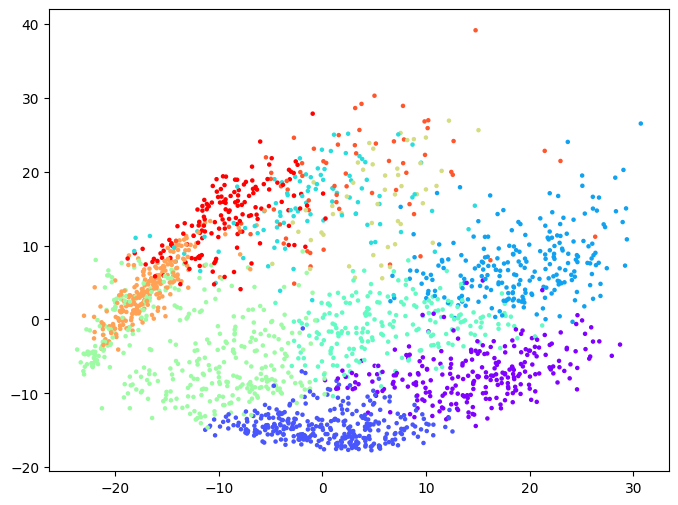

In [4]:
pca_best = PCA(n_components=96)
X_pca_best = pca_best.fit_transform(X_sub)

kmeans_pca_best = KMeans(n_clusters=10, random_state=1).fit(X_pca_best)
y_kmeans_pca_best = kmeans_pca_best.labels_

cm_pca_best = confusion_matrix(y_sub, y_kmeans_pca_best)
row_ind_pca_best, col_ind_pca_best = linear_sum_assignment(-cm_pca_best)
map_pca_best = dict(zip(col_ind_pca_best, row_ind_pca_best))
y_kmeans_aligned_pca_best = np.array([map_pca_best[label] for label in y_kmeans_pca_best])
print("Confusion Matrix (pca_best): \n", confusion_matrix(y_sub, y_kmeans_aligned_pca_best))

accuracy = np.mean(y_kmeans_aligned_pca_best == y_sub)
print("Clustering accuracy :", accuracy)

pca2 = PCA(n_components=2)
X_pca2_pca_best = pca2.fit_transform(X_pca_best)
plt.figure(figsize=(8,6))
plt.scatter(X_pca2_pca_best[:,0],X_pca2_pca_best[:,1],c=y_kmeans_aligned_pca_best, s=5, cmap="rainbow")
plt.show()